# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- CFTC Fines ‘Decentralized’ Prediction Market Platform Polymarket $1.4 Million, Shuts Down Noncompliant Markets.  The U.S. Commodity Futures Trading Commission (CFTC) has ordered a &#x201C;decentralized&#x201D; prediction market platform to shut down non-compliant markets and pay a fine of $1.4 million. &#x201C;Polymarket had been operating an illegal unregistered or non-designated facility for event-based binary options online trading contracts, known as &#x2018;event markets,'&#x201D; said the derivatives regulator. CFTC Takes First Crypto [&#8230;] ... [| Skaityti daugiau](https://news.bitcoin.com/cftc-fines-decentralized-prediction-market-platform-polymarket-1-4-million-shuts-down-noncompliant-markets/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- The National: COVID disruptions, Ontario restrictions, Child welfare compensation.  Jan. 3, 2022: School's out, restrictions are in as provinces race to combat Omicron. Plus, one woman's long fight for First Nations child welfare compensation. ... [| Skaityti daugiau](http://www.cbc.ca/player/play/1961983043633) 

### Kainų kaita pandemijos metu

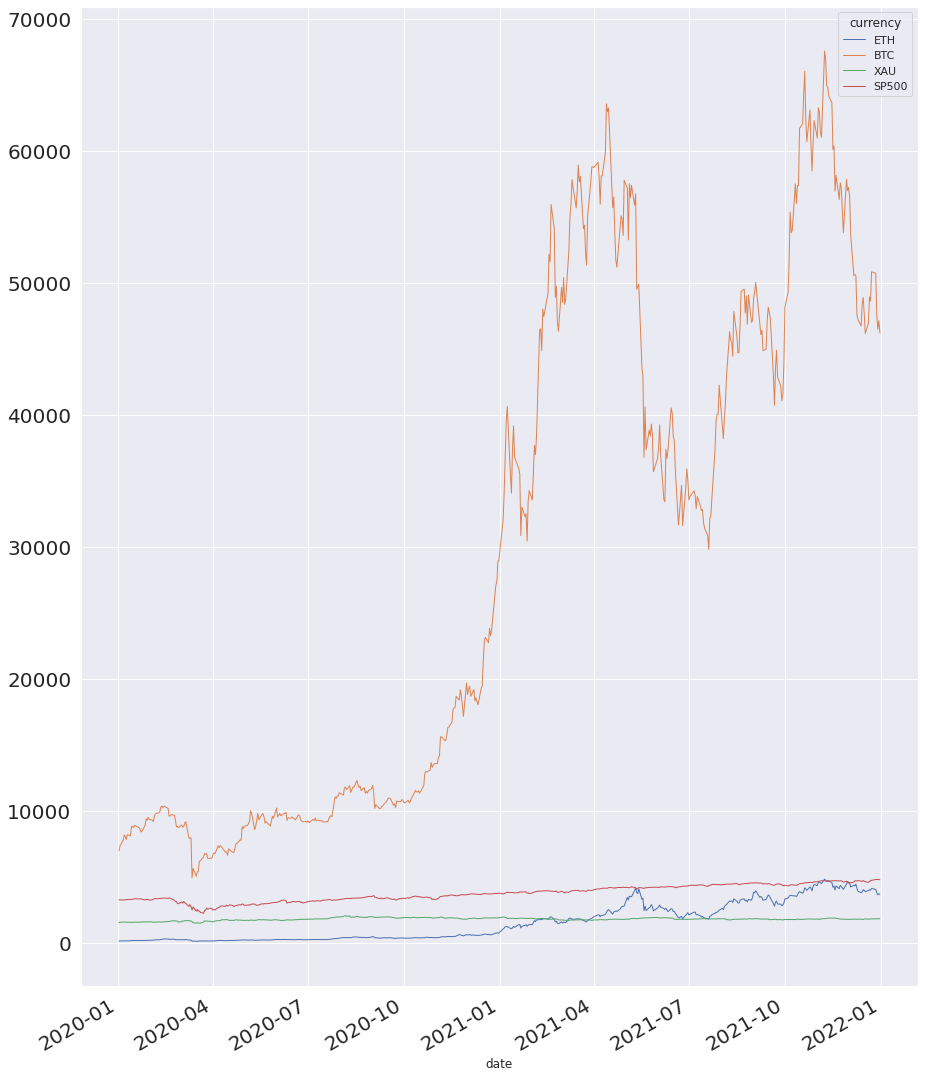

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.904450,0.148662,0.914900
BTC,0.904450,1.000000,0.132631,0.878314
XAU,0.148662,0.132631,1.000000,0.298711
SP500,0.914900,0.878314,0.298711,1.000000


In [8]:
#hide ### Koreliacijos matrica.

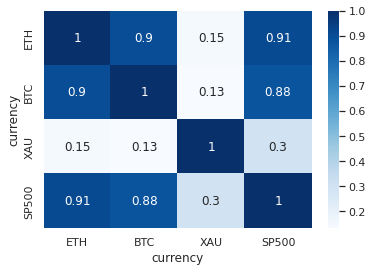

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')